# Prepoznavanje lica uz pomoć SVM-a

## Import potrebnih biblioteka

In [1]:
from sklearn.datasets import fetch_lfw_people
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

## Prikaz podataka s kojima radimo

In [2]:
lica = fetch_lfw_people(min_faces_per_person=60)

In [ ]:
lica.images.shape

(1348, 62, 47)

In [ ]:
lica

{'data': array([[0.53464055, 0.5254902 , 0.49673203, ..., 0.00653595, 0.00653595,
         0.00261438],
        [0.28627452, 0.20784314, 0.2522876 , ..., 0.96993464, 0.9490196 ,
         0.9346406 ],
        [0.31895426, 0.39215687, 0.275817  , ..., 0.4261438 , 0.7908497 ,
         0.9555555 ],
        ...,
        [0.11633987, 0.11111111, 0.10196079, ..., 0.5686274 , 0.5803922 ,
         0.5542484 ],
        [0.19346406, 0.21176471, 0.2901961 , ..., 0.6862745 , 0.654902  ,
         0.5908497 ],
        [0.12287582, 0.09803922, 0.10980392, ..., 0.12941177, 0.1633987 ,
         0.29150328]], dtype=float32),
 'images': array([[[0.53464055, 0.5254902 , 0.49673203, ..., 0.2653595 ,
          0.2653595 , 0.26013073],
         [0.56993467, 0.545098  , 0.4797386 , ..., 0.26143792,
          0.2627451 , 0.26013073],
         [0.5882353 , 0.5398693 , 0.47712418, ..., 0.2653595 ,
          0.26013073, 0.25751635],
         ...,
         [0.59869283, 0.7176471 , 0.4013072 , ..., 0.00522876,
     

## Vizualizacija nekolicine podataka:

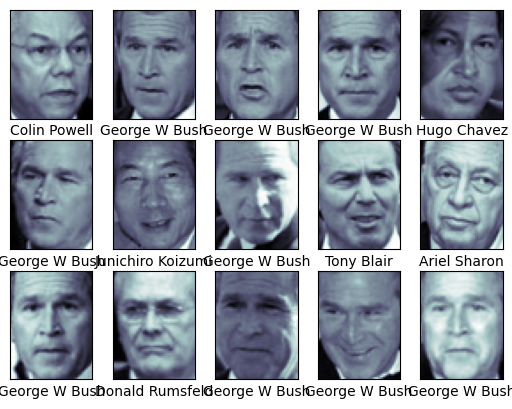

In [ ]:
fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(lica.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[], xlabel=lica.target_names[lica.target[i]])

## Podjela podataka i izrada modela

In [ ]:
pca = PCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)
X_train, X_test, y_train, y_test = train_test_split(lica['data'], lica['target'], test_size=0.2, random_state=42)

## Tražimo najbolji model

In [ ]:
param_grid ={
    'svc__C': [1, 5, 10, 15],
    'svc__gamma': [0.0001, 0.0005, 0.001, 0.005],
}
grid = GridSearchCV(model, param_grid=param_grid, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('pca',
                                        PCA(n_components=150, random_state=42,
                                            whiten=True)),
                                       ('svc', SVC(class_weight='balanced'))]),
             param_grid={'svc__C': [1, 5, 10, 15],
                         'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]})

In [ ]:
grid.best_params_

{'svc__C': 1, 'svc__gamma': 0.005}

In [ ]:
grid.best_estimator_

Pipeline(steps=[('pca', PCA(n_components=150, random_state=42, whiten=True)),
                ('svc', SVC(C=1, class_weight='balanced', gamma=0.005))])

## Predviđanje

In [ ]:
finalniModel = grid.best_estimator_
y_pred = finalniModel.predict(X_test)

## Vizualizacija

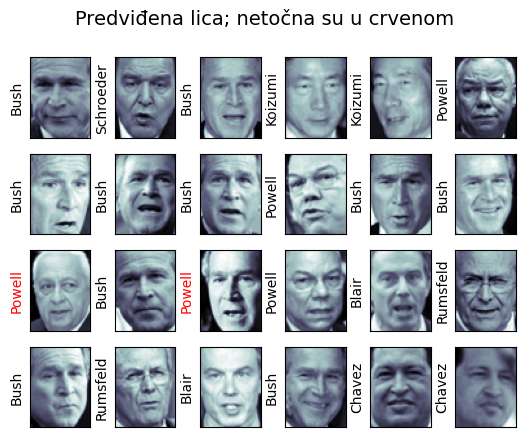

In [ ]:
fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(X_test[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(lica.target_names[y_pred[i]].split()[-1],
                  color='black' if y_pred[i] == y_test[i] # točno
                  else 'red') # netočno

fig.suptitle('Predviđena lica; netočna su u crvenom', size=14);

## Evaluacija

In [ ]:
y_train_pred = finalniModel.predict(X_train)
tocnost_train = accuracy_score(y_train, y_train_pred)
tocnost_train

0.9879406307977736

Model ima 98.79% točnosti na skupu za treniranje.

In [ ]:
tocnost = accuracy_score(y_test, y_pred)
tocnost

0.8740740740740741

Model ima 87.40% točnosti na skupu za testiranje.

Matrica konfuzije:

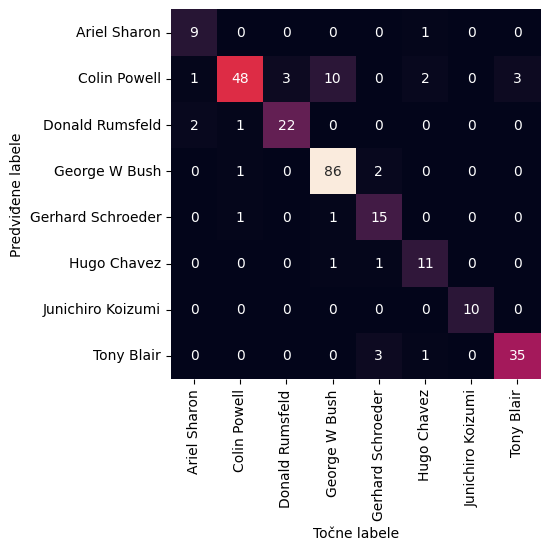

In [ ]:
matrica = confusion_matrix(y_test, y_pred)
matrica = matrica.T
sns.heatmap(data=matrica,
            square=True,
            annot=True,
            cbar=False,
            xticklabels=lica.target_names,
            yticklabels=lica.target_names
           );

plt.xlabel('Točne labele')
plt.ylabel('Predviđene labele');